# Material Deformation - Using QUBO


In [1]:
import sys as sys
import pandas as pd
import numpy as np
import pandas as pd
import random, math
import copy
import numba
from numba import jit
import tqdm
from time import time
from tqdm import tqdm
from matplotlib import pyplot as plt
df = pd.read_csv(r'C:\Users\Bhargav\BMW\Set A\128x128_-16%-9436.csv',header=None)
#df.as_matrix()



In [2]:
#np.set_printoptions(threshold=sys.maxsize)

In [3]:
X1 = df.values

In [4]:
X1

array([[ 0.,  0.,  0., ...,  0., 18.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [30.,  0.,  0., ...,  0., 26.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 21.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [5]:

X1.shape

(128, 128)

In [6]:
X = np.true_divide(X1 ,  2000)

In [7]:
X

array([[0.    , 0.    , 0.    , ..., 0.    , 0.009 , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.015 , 0.    , 0.    , ..., 0.    , 0.013 , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.0105, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]])

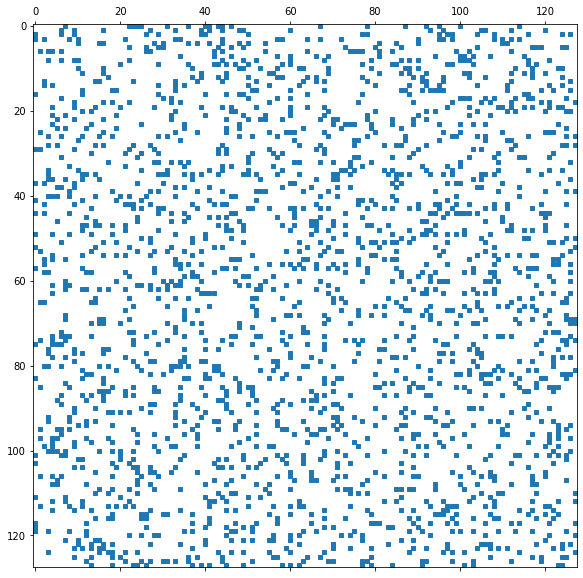

In [8]:
plt.spy(X, precision = 0.01, markersize = 4)
# betterspy.write_png("out.png", X , border_width=2, border_color="red", colormap="viridis")
# betterspy 1138.mtx [Matrix.png]
# betterspy.show(X)
# betterspy.write_png("X matrix", X)
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*2.5, Size[1]*2.5, forward=True)

# plt.colorbar()
# plt.show()

In [9]:
df1 = pd.read_csv(r'C:\Users\Bhargav\BMW\Set A\128x1_-16%-9436.csv',header=None)
#df.as_matrix()

In [10]:


Y1=df1.values

In [11]:
Y1.shape

(128, 1)

In [12]:
Y = np.true_divide(Y1 , 2000)

In [13]:
Y

array([[0.    ],
       [0.0125],
       [0.0155],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.0095],
       [0.011 ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.013 ],
       [0.    ],
       [0.0095],
       [0.0115],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.0085],
       [0.    ],
       [0.    ],
       [0.01  ],
       [0.007 ],
       [0.    ],
       [0.012 ],
       [0.    ],
       [0.    ],
       [0.009 ],
       [0.    ],
       [0.0125],
       [0.0115],
       [0.0105],
       [0.01  ],
       [0.0125],
       [0.013 ],
       [0.0145],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.0135],
       [0.    ],
       [0.0115],
       [0.0115],
       [0.009 ],
       [0.    ],
       [0.0115],
       [0.    ],
       [0.0095],
       [0.011 ],
       [0.012 ],
       [0.    ],
       [0.    ],
       [0.013 ],
       [0.    

In [14]:
Dimension = 128
bits = 13     
#b = HDimension = 16
#qubits = 2
A = X
b = Y
m = 6

In [15]:
t0 = time()

In [16]:
QM = np.zeros(((bits+1)*Dimension, (bits+1)*Dimension), dtype=np.float64)
QM

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
QM.shape

(1792, 1792)

In [18]:
for k in range(Dimension):
    for i in range(Dimension):
        for l in range(-8,5):
            cef1 = pow(2,2*l)* pow (A[k][i],2)-pow(2,l+1)* A[k][i]*b[k]
            po1 = 14*i + l + 8
            QM[po1][po1] = QM[po1][po1] + cef1
            #################################################
            cef2 = -pow(2,(l+m+2))* pow (A[k][i],2)
            po3 = 14*i + 1  # q_i-
            po4 = 14*i + l + 8 #q_i,l +
            QM[po3][po4] = QM[po3][po4] + cef2
            
            
#QM #okkkkkkkkkkkkkkkkkkkkkk

In [19]:

# No l loop +13?????

# 2nd for loop
for k in range(Dimension):
    for i in range(Dimension):
            cef1 = pow(2,(2*m+2))* pow (A[k][i],2)
            cef2= pow(2,m+2)* A[k][i]*b[k]
            po1 = 14*i  
            po2 = 14*i + 1
            QM[po2][po2] = QM[po2][po2] + cef1 #q-
            QM[po1][po1] = QM[po1][po1] + cef2  # q+
            
#QM #okkkkkkkkkkkkkkkkkk

In [20]:
# 3rd for loop
@jit(nopython=True)

def faster0(QM): 
    for k in range(Dimension):
        for i in range(Dimension):
            for l1 in range(-8,5):
                for l2 in range(l1+1,5):
                    qcef = pow(2, l1+l2+1)*pow(A[k][i],2)
                    po1 = 14*i + l1 + 8
                    po2 = 14*i + l2 + 8
                    QM[po1][po2] = QM[po1][po2] + qcef
    return QM

QM = faster0(QM)  
#QM
######### okkkkkk 

In [21]:
## 4th for loop
@jit(nopython=True)

def faster(QM):  
    for k in range(Dimension):
        for i in range(Dimension-1):
            for j in range(i+1,Dimension):
                for l1 in range(-8,5):
                    for l2 in range(-8,5):
                        qcef = pow(2, l1+l2+1) * A[k][i] * A[k][j]
                        po1 = 14*i + l1 + 8
                        po2 = 14*j + l2 + 8
                        QM[po1][po2] = QM[po1][po2] + qcef
    return QM

QM = faster(QM) 
#QM
#### okkkkkkkkkkkkkkkkkkkkk

In [22]:
###5th loop
@jit(nopython=True)

def faster1(QM): 
    for k in range(Dimension):
        for i in range(Dimension-1):
            for j in range(i+1,Dimension):
                qcef = pow(2, m+3) * A[k][i]*A[k][j]
                po1 = 14*i + 1
                po2 = 14*j + 1
                QM[po1][po2] = QM[po1][po2] + qcef

                for l in range(-8,5):
                    qcef1 = -pow(2, l+m+2) * A[k][i] * A[k][j]
                    po1 = 14*i + 1  # q_i -
                    po2 = 14*j + l + 8 # q_j,l +
                    QM[po1][po2] = QM[po1][po2] + qcef1

                    po3 = 14*i + l + 8  #q_i,l+
                    po4 = 14*j + 1  # q_j-
                    QM[po3][po4] = QM[po3][po4] + qcef1
    return QM
                
QM = faster1(QM)
#QM
###okkkkkkkkkkkkk

In [23]:
QM

array([[ 5.17808254e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.72525000e-03,  6.10270141e+01, -1.49010000e-02, ...,
        -7.93600000e-01, -1.58720000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -6.23014526e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.39260000e-01,  6.60992000e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  6.09016000e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [24]:
time_taken_qubogen=time()-t0
time_taken_qubogen

9.424916744232178

In [25]:
from dwave.system import LeapHybridSampler

In [26]:
sampler = LeapHybridSampler(Profile='Max1')

In [27]:
# %%capture captured
# # Print Python code for the run in D-Wave quantum processing unit
# print("\n\nfrom dwave.system import DWaveSampler, EmbeddingComposite")
# print("sampler_auto = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))\n")
# #from dwave.system import DWaveSampler, EmbeddingComposite
# #sampler_auto = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))

# print("linear = {", end = "")
# for i in range((bits+1)*Dimension-1): 
#     linear = i + 1
#     print ("('q",linear,"','q",linear,"'):",format(QM[i][i]),sep='', end = ", ")
# print ("('q",(bits+1)*Dimension,"','q",(bits+1)*Dimension,"'):",format(QM[(bits+1)*Dimension-1][(bits+1)*Dimension-1]),"}", sep='')

# print("\nquadratic = {", end = "")
# for i in range((bits+1)*Dimension-1):
#     for j in range(i+1,(bits+1)*Dimension):
#         if QM[i][j] != 0:
#             qdrt1 = i + 1
#             qdrt2 = j + 1
#             if i == (bits+1)*Dimension-2 and j == (bits+1)*Dimension-1:
#                 print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), "}", sep='')
#             else:
#                 print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), sep ='', end = ", ")

# print("\nQ = dict(linear)")
# print("Q.update(quadratic)\n")

# qa_iter = 1000
# #print("sampleset = sampler_auto.sample_qubo(Q, num_reads=",qa_iter,")", sep = "")
# #print("print(sampleset)")

# #Q = dict(linear)
# #Q.update(quadratic)
# print("sampleset = sampler.sample_qubo(Q)")
# print("print(sampleset)")
# #sampleset = sampler_auto.sample_qubo(Q, num_reads=1000)
# #print(sampleset)


In [28]:
f = open("code128_16sp1%.py", "a")
# Print Python code for the run in D-Wave quantum processing unit
print("\n\nfrom dwave.system import DWaveSampler, EmbeddingComposite", file=f)
print("#sampler_auto = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))\n", file=f)
print("linear = {", end = "", file=f)

for i in range((bits+1)*Dimension-1):
    linear = i + 1
    print ("('q",linear,"','q",linear,"'):",format(QM[i][i]),sep='', end = ", ", file=f)
print ("('q",(bits+1)*Dimension,"','q",(bits+1)*Dimension,"'):",format(QM[((bits+1)*Dimension)-1][((bits+1)*Dimension)-1]),"}", sep='', file=f)
print("\nquadratic = {", end = "", file=f)
for i in range((bits+1)*Dimension-1):
    for j in range(i+1,(bits+1)*Dimension):
        if QM[i][j] != 0:
            qdrt1 = i + 1
            qdrt2 = j + 1
            if i == (bits+1)*Dimension-2 and j == (bits+1)*Dimension-1:
                print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), "}", sep='', file=f)
            else:
                print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), sep ='', end = ", ", file=f)
print("\nQ = dict(linear)", file=f)
print("Q.update(quadratic)\n", file=f)
qa_iter = 1000
print("sampleset = sampler.sample_qubo(Q)", sep = "", file=f)
print("print(sampleset)", file=f)
f.close()





In [31]:
t1 = time()

In [32]:
f = open("code128_16sp1%.py", "r")
exec(f.read())
f.close()

  q1 q10 q100 q1000 q1001 q1002 q1003 q1004 ... q999        energy num_oc.
0  0   1    1     1     1     1     1     1 ...    1 -53303.528778       1
['BINARY', 1 rows, 1 samples, 1792 variables]


In [33]:
time_taken_quboans=time()-t1
time_taken_quboans

63.782625675201416

In [ ]:
#str=captured.stdout

In [ ]:
#exec(str)

## Sample code for testing the zip method

In [46]:
hi_1 = [ 1, 0 , 1 , 1 , 1 , 1, 0 , 0, 1 ]
hello_1 =[1,5,  3,  6,  9,  2, 4, 7,   8]

hi_1_sorted = [x for _,x in sorted(zip(hello_1,hi_1))]
print(hi_1_sorted)     # 1,2,3,4,5,6,7,8,9 <-> 1,1,1,0,0,1,0,1,1

[1, 1, 1, 0, 0, 1, 0, 1, 1]


# Sorting record array with respect to variables array.

In [41]:
#qubit_values
sampleset.record

rec.array([([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 

In [42]:
sampleset.variables

Variables(['q1', 'q10', 'q100', 'q1000', 'q1001', 'q1002', 'q1003', 'q1004', 'q1005', 'q1006', 'q1007', 'q1008', 'q1009', 'q101', 'q1010', 'q1011', 'q1012', 'q1013', 'q1014', 'q1015', 'q1016', 'q1017', 'q1018', 'q1019', 'q102', 'q1020', 'q1021', 'q1022', 'q1023', 'q1024', 'q1025', 'q1026', 'q1027', 'q1028', 'q1029', 'q103', 'q1030', 'q1031', 'q1032', 'q1033', 'q1034', 'q1035', 'q1036', 'q1037', 'q1038', 'q1039', 'q104', 'q1040', 'q1041', 'q1042', 'q1043', 'q1044', 'q1045', 'q1046', 'q1047', 'q1048', 'q1049', 'q105', 'q1050', 'q1051', 'q1052', 'q1053', 'q1054', 'q1055', 'q1056', 'q1057', 'q1058', 'q1059', 'q106', 'q1060', 'q1061', 'q1062', 'q1063', 'q1064', 'q1065', 'q1066', 'q1067', 'q1068', 'q1069', 'q107', 'q1070', 'q1071', 'q1072', 'q1073', 'q1074', 'q1075', 'q1076', 'q1077', 'q1078', 'q1079', 'q108', 'q1080', 'q1081', 'q1082', 'q1083', 'q1084', 'q1085', 'q1086', 'q1087', 'q1088', 'q1089', 'q109', 'q1090', 'q1091', 'q1092', 'q1093', 'q1094', 'q1095', 'q1096', 'q1097', 'q1098', 'q109

 ### Cleanup of variables array done in MS-Word. Following which we obtain the following array. 
 ### Note: hello array = Variables array

In [43]:
hello=np.array([1, 10, 100, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 101, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 102, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 103, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 104, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 105, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 106, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 107, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 108, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 109, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 11, 110, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 111, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 112, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 113, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 114, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 115, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 116, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 117, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 118, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 119, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 12, 120, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 121, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 122, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 123, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 124, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 125, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 126, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 127, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 128, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 129, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 13, 130, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 131, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 132, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 133, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 134, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 135, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 136, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 137, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 138, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 139, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 14, 140, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 141, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 142, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 143, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 144, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 145, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 146, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 147, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 148, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 149, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 15, 150, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 151, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 152, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 153, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 154, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 155, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 156, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 157, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 158, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 159, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 16, 160, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 161, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 162, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 163, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 164, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 165, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 166, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 167, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 168, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 169, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 17, 170, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 171, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 172, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 173, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 174, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 175, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 176, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 177, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 178, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 179, 1790, 1791, 1792, 18, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 2, 20, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 21, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 23, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 24, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 25, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 26, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 27, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 28, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 29, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 3, 30, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 31, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 32, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 33, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 34, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 35, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 36, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 37, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 38, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 39, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 4, 40, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 41, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 42, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 43, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 44, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 45, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 46, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 47, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 48, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 49, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 5, 50, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 51, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 52, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 53, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 54, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 55, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 56, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 57, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 58, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 59, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 6, 60, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 61, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 62, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 63, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 64, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 65, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 66, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 67, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 68, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 69, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 7, 70, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 71, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 72, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 73, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 74, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 75, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 76, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 77, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 78, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 79, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 8, 80, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 81, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 82, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 83, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 84, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 85, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 86, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 87, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 88, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 89, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 9, 90, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 91, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 92, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 93, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 94, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 95, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 96, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 97, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 98, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 99, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])
len(hello)


1792

### Note: hi array = record array

In [44]:

hi=np.array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

### Finally sorting done as desired

In [45]:
hi_sorted = [x for _,x in sorted(zip(hello,hi))]
print(hi_sorted)  

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# Converting into real number (x_i) from the qubits q_0,q_1,....,q_8191= Penguin(= hi_sorted) using equation (11) in https://arxiv.org/pdf/2106.10819.pdf

### Note : In Penguin, some are q+ and some are q-. The following code gives the indices of q+ and q- in Penguin.
### Namely, h gives the indices of q+ AND q gives the indices of q-


In [42]:
# #x=[]
# h=[] ### Positions of q+
# q=[] ### Psotions of q-
# for i in range(0,64):
#     for l in range(-61,3):
#         q_plus=(128*i + l + 61)   
#         h.append(q_plus)
#         q_minus=(128*i + l + 61 + 64)  ### postions
#         q.append(q_minus)
#         #y=pow(2,l)*q_plus - pow(2,l)*q_minus
#         #x.append(y)

In [47]:
#po1 = 64*i + l + 29  ### q+ positions
#po2 = 64*i + l + 29 + 32 ### q- positions

### THIS REQUIRES VERIFICATION THOUGH.

x=[]

for i in range(0,128):
    y=0
    for l in range(-8,5):
        y+=-pow(2,m+1)*hi_sorted[14*i + 1] + pow(2,l)*hi_sorted[14*i + 8 + l]
        #print(y)
    x.append(y)

### Final Solutions obtained as follows :

In [48]:
x

[-1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.00390625,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.

# LET'S NOW HOPE FOR THE BEST. BECAUSE HOPE IS A GOOD THING, MAY BE THE BEST OF THINGS, AND NO GOOD THING EVER DIES  ! :)

In [49]:
qwe=np.array(x)
qwe.shape
np.reshape(qwe, (128, 1))

array([[-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.00390625],
       [-1632.0078125 ],
       [-1632.0078125 ],
       [-1632.0078125 ],


In [50]:
A = X

# take a 3x4 matrix
B = [[-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125]]
# result will be 3x4
result = [[sum(a * b for a, b in zip(A_row, B_col))
						for B_col in zip(*B)]
								for A_row in A]

for r in result:
	print(r)

[-469.2022460937501]
[-438.19409765624994]
[-487.15433203124996]
[-561.4106875]
[-387.60185546875005]
[-408.00195312499994]
[-430.03405859375]
[-308.44947656249997]
[-486.338328125]
[-423.50602734374985]
[-449.61815234375]
[-405.5539414062499]
[-422.6900234375]
[-417.7939999999999]
[-362.30573437500004]
[-474.9142734375]
[-273.36130859375]
[-394.945890625]
[-421.87401953125]
[-501.0263984375]
[-399.02591015625]
[-347.61766406249995]
[-416.97799609374994]
[-457.77819140624996]
[-291.31339453124997]
[-456.14618359375004]
[-490.4183476562499]
[-340.27362890625005]
[-424.32203124999995]
[-363.93774218749996]
[-344.3536484375]
[-389.23386328125]
[-372.91378515624996]
[-284.78536328125]
[-520.6104921875]
[-730.32349609375]
[-368.01776171875]
[-407.18594921875]
[-334.56160156249996]
[-412.08197265625]
[-372.09778125]
[-302.73744921875004]
[-563.85869921875]
[-570.3867304687501]
[-469.20224609375003]
[-351.69768359375]
[-293.76140624999994]
[-558.146671875]
[-458.5941953125]
[-431.666066406250

In [51]:
matrix2 = Y

matrix1= [[-469.2022460937501],
[-438.19409765624994],
[-487.15433203124996],
[-561.4106875],
[-387.60185546875005],
[-408.00195312499994],
[-430.03405859375],
[-308.44947656249997],
[-486.338328125],
[-423.50602734374985],
[-449.61815234375],
[-405.5539414062499],
[-422.6900234375],
[-417.7939999999999],
[-362.30573437500004],
[-474.9142734375],
[-273.36130859375],
[-394.945890625],
[-421.87401953125],
[-501.0263984375],
[-399.02591015625],
[-347.61766406249995],
[-416.97799609374994],
[-457.77819140624996],
[-291.31339453124997],
[-456.14618359375004],
[-490.4183476562499],
[-340.27362890625005],
[-424.32203124999995],
[-363.93774218749996],
[-344.3536484375],
[-389.23386328125],
[-372.91378515624996],
[-284.78536328125],
[-520.6104921875],
[-730.32349609375],
[-368.01776171875],
[-407.18594921875],
[-334.56160156249996],
[-412.08197265625],
[-372.09778125],
[-302.73744921875004],
[-563.85869921875],
[-570.3867304687501],
[-469.20224609375003],
[-351.69768359375],
[-293.76140624999994],
[-558.146671875],
[-458.5941953125],
[-431.6660664062501],
[-334.56160156249996],
[-517.3464765625],
[-333.74559765624997],
[-403.10592968749995],
[-476.54628125000005],
[-465.1222265625001],
[-417.794],
[-515.71446875],
[-502.6584062499999],
[-349.24967187500005],
[-479.81029687499995],
[-421.058015625],
[-495.31437109374997],
[-452.06616406250004],
[-387.60185546874993],
[-386.7858515625],
[-350.06567578125004],
[-478.99429296875],
[-402.28992578125],
[-352.51368749999995],
[-488.78633984375],
[-135.4566484375],
[-314.9775078125],
[-491.2343515625001],
[-456.96218749999997],
[-406.36994531249996],
[-408.00195312500006],
[-345.98565625000003],
[-435.7460859375001],
[-456.1461835937499],
[-471.65025781249994],
[-412.89797656249993],
[-407.18594921875],
[-563.0426953125],
[-318.24152343749995],
[-571.202734375],
[-417.794],
[-459.41019921874994],
[-292.1293984375],
[-297.84142578125005],
[-450.43415625],
[-432.48207031249996],
[-292.1293984375],
[-422.6900234375001],
[-441.45811328124995],
[-452.0661640625],
[-400.6579179687501],
[-443.906125],
[-307.63347265625],
[-435.7460859374999],
[-401.473921875],
[-523.8745078125],
[-362.30573437500004],
[-292.1293984375],
[-395.76189453125005],
[-335.37760546875],
[-502.6584062499999],
[-318.2415234375],
[-407.18594921875007],
[-382.70583203125],
[-404.73793749999993],
[-238.273140625],
[-424.32203125000007],
[-501.84240234375005],
[-383.5218359375],
[-461.04220703125003],
[-425.13803515625],
[-515.7144687500002],
[-316.609515625],
[-532.034546875],
[-393.3138828125],
[-362.305734375],
[-456.9621875],
[-464.30622265624993],
[-459.41019921875005],
[-395.76189453125005],
[-523.8745078125],
[-487.15433203125]]




#output = [[-1, -1, -1], 
		# [-1, 0, -1], 
        # [-1, -1, -1]]

def subtractTheMatrix(matrix1, matrix2):
    matrix1Rows = len(matrix1)
    matrix2Rows = len(matrix2)
    matrix1Col = len(matrix1[0])
    matrix2Col = len(matrix2[0])

    #base case
    if(matrix1Rows != matrix2Rows or matrix1Col != matrix2Col):
        return "ERROR: dimensions of the two arrays must be the same"

    #make a matrix of the same size as matrix 1 and matrix 2
    matrix = []
    rows = []

    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            rows.append(0)
        matrix.append(rows.copy())
        rows = []

    #loop through the two matricies and the subtraction should be placed in the
    #matrix
    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            matrix[i][j] = matrix1[i][j] - matrix2[i][j]
            
    return matrix

print(subtractTheMatrix(matrix1, matrix2))

[[-469.2022460937501], [-438.2065976562499], [-487.16983203124994], [-561.4106875], [-387.60185546875005], [-408.00195312499994], [-430.03405859375], [-308.45897656249997], [-486.349328125], [-423.50602734374985], [-449.61815234375], [-405.5539414062499], [-422.70302343749995], [-417.7939999999999], [-362.31523437500005], [-474.9257734375], [-273.36130859375], [-394.945890625], [-421.87401953125], [-501.0263984375], [-399.02591015625], [-347.61766406249995], [-416.98649609374996], [-457.77819140624996], [-291.31339453124997], [-456.15618359375003], [-490.4253476562499], [-340.27362890625005], [-424.33403124999995], [-363.93774218749996], [-344.3536484375], [-389.24286328125004], [-372.91378515624996], [-284.79786328125], [-520.6219921874999], [-730.33399609375], [-368.02776171875], [-407.19844921875], [-334.57460156249994], [-412.09647265625], [-372.09778125], [-302.73744921875004], [-563.85869921875], [-570.3867304687501], [-469.21574609375006], [-351.69768359375], [-293.7729062499999

In [52]:
#y=np.linalg.solve(A,B)
import numpy as np
t=(subtractTheMatrix(matrix1, matrix2))
m=np.array(t)
g=0
for i in range(0,128):
    y=m[i]
    g+=y*y


u=g/128
y=pow(u,0.5)
y                                                      

array([425.45603268])

# Solution Using GMRES

In [56]:
import scipy.sparse.linalg as sc

In [57]:
c_sol= sc.gmres(X,Y,tol=1e-16)

In [58]:
c_sol


(array([-0.01530601,  0.00375019,  0.13448089,  0.15365693,  0.06191029,
         0.05783024,  0.12602755,  0.03185253,  0.04877503,  0.11404171,
        -0.04050447, -0.1055013 , -0.07444316, -0.05840333,  0.11795521,
        -0.08503122,  0.13546581, -0.10832079,  0.05330054, -0.09741569,
        -0.06434166, -0.01153638,  0.00908001,  0.03093291,  0.0289397 ,
        -0.00390896,  0.03373532, -0.00782227,  0.00804843, -0.03980516,
        -0.13298429,  0.06924455,  0.09109137,  0.01653002,  0.1407556 ,
         0.14772007, -0.06948246, -0.11525964,  0.15624843,  0.02321375,
         0.05609872,  0.05527096, -0.05015722,  0.04738595,  0.02680638,
         0.13718615, -0.01914702,  0.03883073,  0.00278026,  0.06985751,
         0.10285665,  0.00079914,  0.01214095,  0.00063415, -0.0512967 ,
        -0.19326246,  0.03986524, -0.0871016 , -0.02721198,  0.09392706,
         0.05901759,  0.01050508, -0.0758373 ,  0.07483357, -0.09203368,
         0.18625201, -0.05074855,  0.03897908,  0.0

## Ax

In [59]:
# Program to multiply two matrices using list comprehension

# take a 3x3 matrix
C = X

# take a 3x4 matrix
D = [[-0.01530601],[  0.00375019],[  0.13448089],[  0.15365693],[  0.06191029],[
         0.05783024],[  0.12602755],[  0.03185253],[  0.04877503],[  0.11404171],[
        -0.04050447],[ -0.1055013 ],[ -0.07444316],[ -0.05840333],[  0.11795521],[
        -0.08503122],[  0.13546581],[ -0.10832079],[  0.05330054],[ -0.09741569],[
        -0.06434166],[ -0.01153638],[  0.00908001],[  0.03093291],[  0.0289397 ],[
        -0.00390896],[  0.03373532],[ -0.00782227],[  0.00804843],[ -0.03980516],[
        -0.13298429],[  0.06924455],[  0.09109137],[  0.01653002],[  0.1407556 ],[
         0.14772007],[ -0.06948246],[ -0.11525964],[  0.15624843],[  0.02321375],[
         0.05609872],[  0.05527096],[ -0.05015722],[  0.04738595],[  0.02680638],[
         0.13718615],[ -0.01914702],[  0.03883073],[  0.00278026],[  0.06985751],[
         0.10285665],[  0.00079914],[  0.01214095],[  0.00063415],[ -0.0512967 ],[
        -0.19326246],[  0.03986524],[ -0.0871016 ],[ -0.02721198],[  0.09392706],[
         0.05901759],[  0.01050508],[ -0.0758373 ],[  0.07483357],[ -0.09203368],[
         0.18625201],[ -0.05074855],[  0.03897908],[  0.0382122 ],[  0.02440503],[
        -0.06814207],[ -0.12695373],[  0.09596268],[  0.07717824],[  0.07294381],[
         0.15291284],[  0.03548761],[  0.08116726],[  0.01475664],[  0.13466735],[
         0.10079087],[  0.01427202],[  0.00602099],[  0.11358644],[ -0.12475251],[
         0.04929932],[ -0.01457509],[  0.06357728],[  0.02472124],[  0.08145796],[
        -0.12641478],[  0.05772166],[  0.02519545],[  0.03627067],[  0.00988261],[
         0.05806847],[  0.09515239],[ -0.02875942],[  0.0823997 ],[ -0.08243843],[
        -0.04128227],[  0.05833485],[ -0.0441098 ],[  0.04798307],[ -0.04127508],[
        -0.03690739],[  0.10422858],[ -0.01968625],[  0.06135619],[ -0.04332135],[
         0.04369299],[ -0.00318615],[ -0.11109251],[  0.02601913],[ -0.10184496],[
         0.07851321],[  0.1382912 ],[  0.16619887],[  0.03003407],[ -0.03678233],[
         0.10068192],[  0.07737092],[  0.10609793],[ -0.01214323],[ -0.01976993],[
         0.01888841],[ -0.00423736],[  0.07314442]]



# result will be 3x4
result = [[sum(a * b for a, b in zip(C_row, D_col))
						for D_col in zip(*D)]
								for C_row in C]

for r in result:
	print(r)

[0.0037111197650000005]
[0.011742777740000003]
[0.013497992975000003]
[0.00565458573]
[0.0010340853200000001]
[0.00659778684]
[0.0020404444550000005]
[0.0020676621450000003]
[0.012111026585]
[0.00367105568]
[0.0061839872749999995]
[0.0064745688749999995]
[0.0065383873350000005]
[0.007567209880000001]
[0.006287733349999999]
[0.003309831495]
[0.003990784205]
[0.006878313449999999]
[0.007646004009999999]
[0.005573092369999998]
[0.002912516775]
[0.005223397609999999]
[0.009162538060000001]
[0.00664379246]
[0.005961420869999999]
[0.010478435089999998]
[0.00765629643]
[0.004475112765000001]
[0.01211172604]
[-0.0016588019250000003]
[0.0010787223900000009]
[0.00825089382]
[0.0034026139200000003]
[0.0031831526300000012]
[0.009253478444999998]
[0.010785785890000002]
[-0.0018032620800000003]
[0.00098599659]
[0.0066032555199999985]
[0.0074106227549999995]
[0.003039943449999998]
[0.00350002546]
[0.003668154465]
[0.005268352509999999]
[0.0071805264599999995]
[0.005028970825]
[0.009934238785]
[0.0104

## Ax-b

In [60]:
matrix2 = Y

matrix1 = [[0.0037111197650000005],
[0.011742777740000003],
[0.013497992975000003],
[0.00565458573],
[0.0010340853200000001],
[0.00659778684],
[0.0020404444550000005],
[0.0020676621450000003],
[0.012111026585],
[0.00367105568],
[0.0061839872749999995],
[0.0064745688749999995],
[0.0065383873350000005],
[0.007567209880000001],
[0.006287733349999999],
[0.003309831495],
[0.003990784205],
[0.006878313449999999],
[0.007646004009999999],
[0.005573092369999998],
[0.002912516775],
[0.005223397609999999],
[0.009162538060000001],
[0.00664379246],
[0.005961420869999999],
[0.010478435089999998],
[0.00765629643],
[0.004475112765000001],
[0.01211172604],
[-0.0016588019250000003],
[0.0010787223900000009],
[0.00825089382],
[0.0034026139200000003],
[0.0031831526300000012],
[0.009253478444999998],
[0.010785785890000002],
[-0.0018032620800000003],
[0.00098599659],
[0.0066032555199999985],
[0.0074106227549999995],
[0.003039943449999998],
[0.00350002546],
[0.003668154465],
[0.005268352509999999],
[0.0071805264599999995],
[0.005028970825],
[0.009934238785],
[0.010437819210000001],
[0.005982420015],
[0.005980746435],
[0.0033372140600000004],
[0.00885529027],
[0.005183365865],
[0.0068444605600000005],
[0.0032250140349999986],
[0.004528184105],
[0.0013309564099999993],
[0.01212684521],
[0.00435337698],
[0.005886345770000001],
[0.00478080523],
[0.011272290944999997],
[0.0035670195749999997],
[0.007984475279999997],
[0.006906541034999998],
[0.0030832019700000003],
[0.00496226592],
[0.011170848449999998],
[0.009576912165000001],
[0.010231510795],
[0.00198287623],
[0.00528009288],
[0.00601012316],
[0.008421782399999996],
[0.00847089257],
[0.00532170729],
[0.00466159321],
[0.008109971274999999],
[0.01029889126],
[0.014419807730000001],
[0.0026780478200000004],
[0.0030966098950000005],
[-0.002998476925000001],
[0.00290678477],
[0.004045023379999999],
[0.007078453645],
[0.007856074815],
[0.009714125035],
[0.0054227816],
[0.004162763305],
[0.01369346631],
[-0.0011390888249999999],
[0.003319763675],
[0.00697109275],
[0.00490663295],
[0.00214264657],
[0.012953117459999998],
[0.007718782619999998],
[0.00636895939],
[0.00433716968],
[0.005920681069999999],
[0.007755659175],
[0.001815701200000001],
[0.0024122183649999997],
[0.0011291598799999995],
[0.010487680335000001],
[0.008497533285],
[0.004755265585],
[0.0006676043650000003],
[0.004858293035000001],
[0.004299304065000001],
[0.0034763603449999994],
[0.00851946857],
[0.00454864504],
[0.012615419085000003],
[0.0069286070400000005],
[0.00838497303],
[0.004345126140000001],
[0.006129420524999999],
[0.009231521630000001],
[0.007836880525000001],
[0.004667997555],
[0.0027030519549999994],
[0.00149114169],
[0.002251187925],
[0.00284592467],
[0.0017559207550000005],
[0.004277012994999998]]



#output = [[-1, -1, -1], 
		# [-1, 0, -1], 
        # [-1, -1, -1]]

def subtractTheMatrix(matrix1, matrix2):
    matrix1Rows = len(matrix1)
    matrix2Rows = len(matrix2)
    matrix1Col = len(matrix1[0])
    matrix2Col = len(matrix2[0])

    #base case
    if(matrix1Rows != matrix2Rows or matrix1Col != matrix2Col):
        return "ERROR: dimensions of the two arrays must be the same"

    #make a matrix of the same size as matrix 1 and matrix 2
    matrix = []
    rows = []

    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            rows.append(0)
        matrix.append(rows.copy())
        rows = []

    #loop through the two matricies and the subtraction should be placed in the
    #matrix
    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            matrix[i][j] = matrix1[i][j] - matrix2[i][j]
            
    return matrix



print(subtractTheMatrix(matrix1, matrix2))

[[0.0037111197650000005], [-0.0007572222599999973], [-0.002002007024999997], [0.00565458573], [0.0010340853200000001], [0.00659778684], [0.0020404444550000005], [-0.007432337854999999], [0.001111026585000001], [0.00367105568], [0.0061839872749999995], [0.0064745688749999995], [-0.006461612664999999], [0.007567209880000001], [-0.003212266650000001], [-0.008190168505], [0.003990784205], [0.006878313449999999], [0.007646004009999999], [0.005573092369999998], [0.002912516775], [0.005223397609999999], [0.0006625380600000005], [0.00664379246], [0.005961420869999999], [0.00047843508999999805], [0.0006562964299999998], [0.004475112765000001], [0.00011172603999999933], [-0.0016588019250000003], [0.0010787223900000009], [-0.0007491061799999987], [0.0034026139200000003], [-0.009316847369999999], [-0.002246521555000002], [0.000285785890000001], [-0.01180326208], [-0.011514003410000001], [-0.006396744480000001], [-0.007089377245000001], [0.003039943449999998], [0.00350002546], [0.003668154465], [0.

# Loss Function    

In [61]:
t1=(subtractTheMatrix(matrix1, matrix2))
m1=np.array(t1)
g1=0
for i in range(0,128):
    y1=m1[i]
    g1+=y1*y1

u1=g1/128
y1=pow(u1,0.5)
y1

array([0.00555199])

In [62]:
# New loss function :
#qwe and c_sol
#c_sol.size

# ||x_ANNEALING - x_GMRES|| / || x_GMRES ||

z=0
p=0
for i in range(128):
    m=qwe[i]-D[i]
    #print(qwe[i])
    z+=pow(m,2)

    
D=np.array(D)    
for j in range(128):
    o=D[j]
    p+=pow(o,2)
    
u=pow(p,0.5)    
f=pow(z,0.5)  
Result = f/u


Percent= Result * 100
print(Percent, "%")
qwe.size

[2067381.21658312] %


128

# Solution using spsolve

In [63]:
from scipy.sparse.linalg import spsolve
from scipy.sparse import csc_matrix

In [64]:
c_sol1 = spsolve(X, Y)

C:\Users\Bhargav\AppData\Roaming\Python\Python38\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


In [65]:
c_sol1

array([  2.53367592,  -2.27962705,  -3.24678524,  -3.76200613,
        -4.57257635,  -7.93491357,   1.59560943,   3.96981171,
        -5.0559489 ,  -2.18976062,   1.19256786,   2.26241073,
         6.40610437,  -6.199362  ,   2.39296393,  -2.06107475,
        -0.81850704,   1.59512404,   3.15747149,  -3.40991942,
        -2.12036043,   2.13800855,  -1.29629638,   2.29232615,
         4.16323991,   0.73200959,  -5.76394702,  -3.05762705,
        -3.74122933,   2.58421818,  -9.45772523,   1.29277069,
         8.67816974,   6.39964496,   1.2204635 ,  -0.2369933 ,
        -5.27409511,   4.1534701 ,   6.03717346,  -0.80491146,
         0.58256451,  -0.71863655,  -3.77098037,   2.85397646,
        -1.61665069,   0.64446323,   3.42028386,  -1.86828088,
        -0.4659027 ,  -7.41011818,  -4.5756088 ,  -1.30612014,
        -4.84971123,   2.29791858,   5.35990456,   0.33444594,
        -2.68079026,  -5.58901219,  -1.51321058,  -2.18069476,
         3.03944958,  -8.53653645,   0.73503335,  -2.17

## Ax

In [66]:
# Program to multiply two matrices using list comprehension

# take a 3x3 matrix
A = X

# take a 3x4 matrix
B = [[  2.53367592],[  -2.27962705],[  -3.24678524],[  -3.76200613],[
        -4.57257635],[  -7.93491357],[   1.59560943],[   3.96981171],[
        -5.0559489 ],[  -2.18976062],[   1.19256786],[   2.26241073],[
         6.40610437],[  -6.199362  ],[   2.39296393],[  -2.06107475],[
        -0.81850704],[   1.59512404],[   3.15747149],[  -3.40991942],[
        -2.12036043],[   2.13800855],[  -1.29629638],[   2.29232615],[
         4.16323991],[   0.73200959],[  -5.76394702],[  -3.05762705],[
        -3.74122933],[   2.58421818],[  -9.45772523],[   1.29277069],[
         8.67816974],[   6.39964496],[   1.2204635 ],[  -0.2369933 ],[
        -5.27409511],[   4.1534701 ],[   6.03717346],[  -0.80491146],[
         0.58256451],[  -0.71863655],[  -3.77098037],[   2.85397646],[
        -1.61665069],[   0.64446323],[   3.42028386],[  -1.86828088],[
        -0.4659027 ],[  -7.41011818],[  -4.5756088 ],[  -1.30612014],[
        -4.84971123],[   2.29791858],[   5.35990456],[   0.33444594],[
        -2.68079026],[  -5.58901219],[  -1.51321058],[  -2.18069476],[
         3.03944958],[  -8.53653645],[   0.73503335],[  -2.17057248],[
         0.40258507],[   3.21460142],[  -5.04627958],[   4.41924795],[
         4.38205122],[   5.34173106],[   0.51545724],[   3.60404755],[
         0.75140053],[   3.92353722],[  -5.06637145],[   2.67405943],[
         4.24389935],[   5.83155823],[   1.01158914],[   2.14259432],[
        -3.21561815],[   6.99964605],[   2.9296312 ],[   0.89643805],[
        -1.66680304],[   4.01966403],[   3.23808387],[  -7.86908549],[
        -8.31175577],[  -4.66434141],[   3.68728503],[  -3.96735424],[
        -0.58502369],[  -0.39783935],[  -0.64648884],[  -2.17409431],[
         5.55523639],[  -5.17557493],[  -1.77962848],[  12.20493613],[
         7.73179727],[  -2.05677733],[  -4.99598141],[  -0.63285806],[
        -1.42715843],[   1.78437732],[   1.3554495 ],[  -5.6691298 ],[
         1.89726658],[  -0.74684257],[  -1.16001189],[   2.26396961],[
         0.30842155],[   0.60078533],[   2.69443213],[   2.22667994],[
         0.39204484],[   5.87953963],[  -1.79882173],[   3.12111628],[
        -7.25907884],[   1.71060205],[   3.59659288],[  -0.24329926],[
         7.18593728],[  -1.1669511 ],[  -1.67433869],[ -10.64310453]]


# result will be 3x4
result = [[sum(a * b for a, b in zip(A_row, B_col))
						for B_col in zip(*B)]
								for A_row in A]

for r in result:
	print(r)

[1.199999960510567e-10]
[0.012500000164999997]
[0.015499999844999977]
[-2.350000055661994e-10]
[-8.499989601062907e-11]
[-7.999997192476016e-11]
[1.549999763955645e-10]
[0.009499999924999999]
[0.01100000021]
[-3.2499999219615106e-10]
[-5.999997720884664e-11]
[-7.000001966961378e-11]
[0.012999999570000004]
[1.5500000241641665e-10]
[0.009499999915000015]
[0.01150000004999999]
[4.499999678442279e-11]
[-4.15000030867807e-10]
[-1.49999915266541e-10]
[9.000000744663339e-11]
[-1.2000000992884452e-10]
[3.499998901812518e-11]
[0.008499999719999977]
[-2.3000003594383922e-10]
[-1.249999721786299e-10]
[0.009999999979999938]
[0.007000000060000039]
[-1.199999821732689e-10]
[0.011999999830000052]
[-1.2999997085760828e-10]
[-5.999999108663445e-11]
[0.009000000115000028]
[-1.7999999407658507e-10]
[0.012500000005000025]
[0.011499999895000015]
[0.010499999865000068]
[0.009999999874999981]
[0.01249999984499997]
[0.012999999945000004]
[0.014500000215000058]
[-4.0000010248508744e-11]
[1.8000000101547897e-10

## Ax-b

In [67]:
matrix2 = Y

matrix1 = [[1.199999960510567e-10],
[0.012500000164999997],
[0.015499999844999977],
[-2.350000055661994e-10],
[-8.499989601062907e-11],
[-7.999997192476016e-11],
[1.549999763955645e-10],
[0.009499999924999999],
[0.01100000021],
[-3.2499999219615106e-10],
[-5.999997720884664e-11],
[-7.000001966961378e-11],
[0.012999999570000004],
[1.5500000241641665e-10],
[0.009499999915000015],
[0.01150000004999999],
[4.499999678442279e-11],
[-4.15000030867807e-10],
[-1.49999915266541e-10],
[9.000000744663339e-11],
[-1.2000000992884452e-10],
[3.499998901812518e-11],
[0.008499999719999977],
[-2.3000003594383922e-10],
[-1.249999721786299e-10],
[0.009999999979999938],
[0.007000000060000039],
[-1.199999821732689e-10],
[0.011999999830000052],
[-1.2999997085760828e-10],
[-5.999999108663445e-11],
[0.009000000115000028],
[-1.7999999407658507e-10],
[0.012500000005000025],
[0.011499999895000015],
[0.010499999865000068],
[0.009999999874999981],
[0.01249999984499997],
[0.012999999945000004],
[0.014500000215000058],
[-4.0000010248508744e-11],
[1.8000000101547897e-10],
[-1.3999991443913729e-10],
[-2.099999826810084e-10],
[0.013499999919999995],
[-2.0999996186432668e-10],
[0.011499999884999987],
[0.011499999815000071],
[0.009000000104999994],
[-1.7500002271950144e-10],
[0.011499999834999997],
[4.5000012396934075e-11],
[0.009500000064999958],
[0.010999999855000067],
[0.011999999889999988],
[1.050000108561433e-10],
[-1.3499999729216228e-10],
[0.012999999659999976],
[-1.149999782901201e-10],
[0.01349999991499996],
[-1.2499998952586466e-10],
[0.012499999955000025],
[1.3499999729216228e-10],
[0.010500000084999989],
[1.0500002603497371e-10],
[-2.599999590624513e-10],
[0.011499999995000024],
[0.011000000180000039],
[0.017999999995],
[-1.1000000910144081e-10],
[-1.9999973899231804e-11],
[0.010500000010000017],
[0.013000000179999999],
[-1.9999994715913516e-10],
[0.013500000070000018],
[-1.9999960021443997e-11],
[-4.999999112659248e-12],
[0.010500000010000031],
[0.013500000150000052],
[0.014499999684999959],
[1.2999999687846042e-10],
[-2.4000004761326466e-10],
[-1.6000003058569412e-10],
[-2.7999995377836484e-10],
[0.010499999934999987],
[2.1000004036056397e-10],
[0.013000000195],
[0.011499999875000028],
[-5.999999108663445e-11],
[-1.6500000064173515e-10],
[0.015500000049999959],
[-1.2499996870918295e-10],
[5.500001495906126e-11],
[-1.3999999770586413e-10],
[0.014499999949999925],
[-9.499992806305535e-11],
[0.01750000002500004],
[5.0000385776183265e-12],
[0.01299999979999997],
[0.016499999949999983],
[2.5499999681266594e-10],
[0.011500000095000018],
[0.014999999760000014],
[0.011999999909999982],
[-1.9999985174934398e-11],
[0.013999999734999935],
[0.009499999920000002],
[0.012499999825000021],
[-1.3500000076160923e-10],
[0.010499999850000032],
[-2.3000004678586095e-10],
[0.013499999750000005],
[0.014499999814999998],
[0.011000000045000059],
[0.011999999725000036],
[-1.7999998713769116e-10],
[-1.9499998837879673e-10],
[0.013999999810000024],
[0.013000000014999997],
[0.011499999470000022],
[0.010499999804999993],
[-2.4999999292951713e-10],
[-7.999997539420711e-11],
[-1.0499996705437553e-10],
[4.000001718740265e-11],
[-4.100000356582756e-10],
[0.010499999945000046],
[-1.549999989469697e-10]]



#output = [[-1, -1, -1], 
		# [-1, 0, -1], 
        # [-1, -1, -1]]

def subtractTheMatrix(matrix1, matrix2):
    matrix1Rows = len(matrix1)
    matrix2Rows = len(matrix2)
    matrix1Col = len(matrix1[0])
    matrix2Col = len(matrix2[0])

    #base case
    if(matrix1Rows != matrix2Rows or matrix1Col != matrix2Col):
        return "ERROR: dimensions of the two arrays must be the same"

    #make a matrix of the same size as matrix 1 and matrix 2
    matrix = []
    rows = []

    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            rows.append(0)
        matrix.append(rows.copy())
        rows = []

    #loop through the two matricies and the subtraction should be placed in the
    #matrix
    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            matrix[i][j] = matrix1[i][j] - matrix2[i][j]
            
    return matrix



print(subtractTheMatrix(matrix1, matrix2))

[[1.199999960510567e-10], [1.6499999630492646e-10], [-1.5500002323309836e-10], [-2.350000055661994e-10], [-8.499989601062907e-11], [-7.999997192476016e-11], [1.549999763955645e-10], [-7.50000010013574e-11], [2.1000000002824315e-10], [-3.2499999219615106e-10], [-5.999997720884664e-11], [-7.000001966961378e-11], [-4.299999956797196e-10], [1.5500000241641665e-10], [-8.499998448152635e-11], [4.999999025923074e-11], [4.499999678442279e-11], [-4.15000030867807e-10], [-1.49999915266541e-10], [9.000000744663339e-11], [-1.2000000992884452e-10], [3.499998901812518e-11], [-2.800000231673039e-10], [-2.3000003594383922e-10], [-1.249999721786299e-10], [-2.000006237012908e-11], [6.000003879153004e-11], [-1.199999821732689e-10], [-1.6999994814637098e-10], [-1.2999997085760828e-10], [-5.999999108663445e-11], [1.150000285971009e-10], [-1.7999999407658507e-10], [5.000024699830519e-12], [-1.0499998440161029e-10], [-1.3499993310739367e-10], [-1.2500001901616375e-10], [-1.5500003017199226e-10], [-5.49999958

# Loss Function

In [68]:
t2=(subtractTheMatrix(matrix1, matrix2))
m2=np.array(t2)
g2=0
for i in range(0,128):
    y2=m2[i]
    g2+=y2*y2

u2=g2/128

y2=pow(u2,0.5)
y2

array([1.67705679e-10])

In [ ]:
### New loss function 

In [72]:
# ||x_ANNEALING - x_SPSOLVE|| / || x_SPSOLVE ||

z=0
p=0
for i in range(128):
    m=qwe[i]-B[i]
    #print(qwe[i])
    z+=pow(m,2)

    
B=np.array(B)    
for j in range(128):
    o=B[j]
    #print(o)
    p+=pow(o,2)
    
u=pow(p,0.5)    
f=pow(z,0.5)  
Result = f/u


Percent= Result * 100
print(Percent, "%")
qwe.size

[39881.7319125] %


128